In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Import

In [3]:
df = pd.read_csv("completed_datasets/customer_order_time_finished.csv", sep = ",")
df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_geo_lat,customer_geo_lng,seller_id,seller_zip_code_prefix,seller_city,seller_state,...,sum_product_weight_g,sum_product_height_cm,sum_product_width_cm,sum_product_length_cm,summed_freight_value,min_order_purchase_timestamp,max_order_delivered_carrier_date,max_order_delivered_customer_date,max_order_estimated_delivery_date,delivery_days
0,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,-21.762775,-41.309633,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,...,650.0,9.0,14.0,28.0,13.29,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,7.614421
1,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,-20.220527,-50.903424,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,...,30000.0,30.0,40.0,50.0,19.93,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,16.216181
2,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,-19.870305,-44.593326,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,...,3050.0,13.0,33.0,33.0,17.87,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,7.948437
3,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,-23.089925,-46.611654,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,...,200.0,10.0,15.0,16.0,12.79,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,6.147269
4,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,-23.243402,-46.827614,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,...,3750.0,40.0,30.0,35.0,18.14,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,25.114352


# Legend of tasks for this goal

- check nans -Done
- Boxplot for package means
- prediction of delivery days based on customer/seller lat/lng and package details -Done
- determine with a small analysis why the model predicts stuff a certain way -Done

# Workflow

## Heatmap to check for correlation between data

In [4]:
df_og = df.copy()
df = df.drop(
    [
        "customer_city",
        "customer_state",
        "seller_city",
        "seller_state",
        "order_item_id",
        "count_product_id",
        "min_order_purchase_timestamp",
        "max_order_delivered_carrier_date",
        "max_order_delivered_customer_date",
        "max_order_estimated_delivery_date",
        "customer_id",
        "seller_id",
        "order_id"
    ],
    axis = 1
)
df.head(5)

,customer_zip_code_prefix,customer_geo_lat,customer_geo_lng,seller_zip_code_prefix,seller_geo_lat,seller_geo_lng,sum_product_weight_g,sum_product_height_cm,sum_product_width_cm,sum_product_length_cm,summed_freight_value,delivery_days
0,28013,-21.762775,-41.309633,27277,-22.496953,-44.127492,650.0,9.0,14.0,28.0,13.29,7.614421
1,15775,-20.220527,-50.903424,3471,-23.565096,-46.518565,30000.0,30.0,40.0,50.0,19.93,16.216181
2,35661,-19.870305,-44.593326,37564,-22.262584,-46.171124,3050.0,13.0,33.0,33.0,17.87,7.948437
3,12952,-23.089925,-46.611654,14403,-20.553624,-47.387359,200.0,10.0,15.0,16.0,12.79,6.147269
4,13226,-23.243402,-46.827614,87900,-22.929384,-53.135873,3750.0,40.0,30.0,35.0,18.14,25.114352


<Axes: >

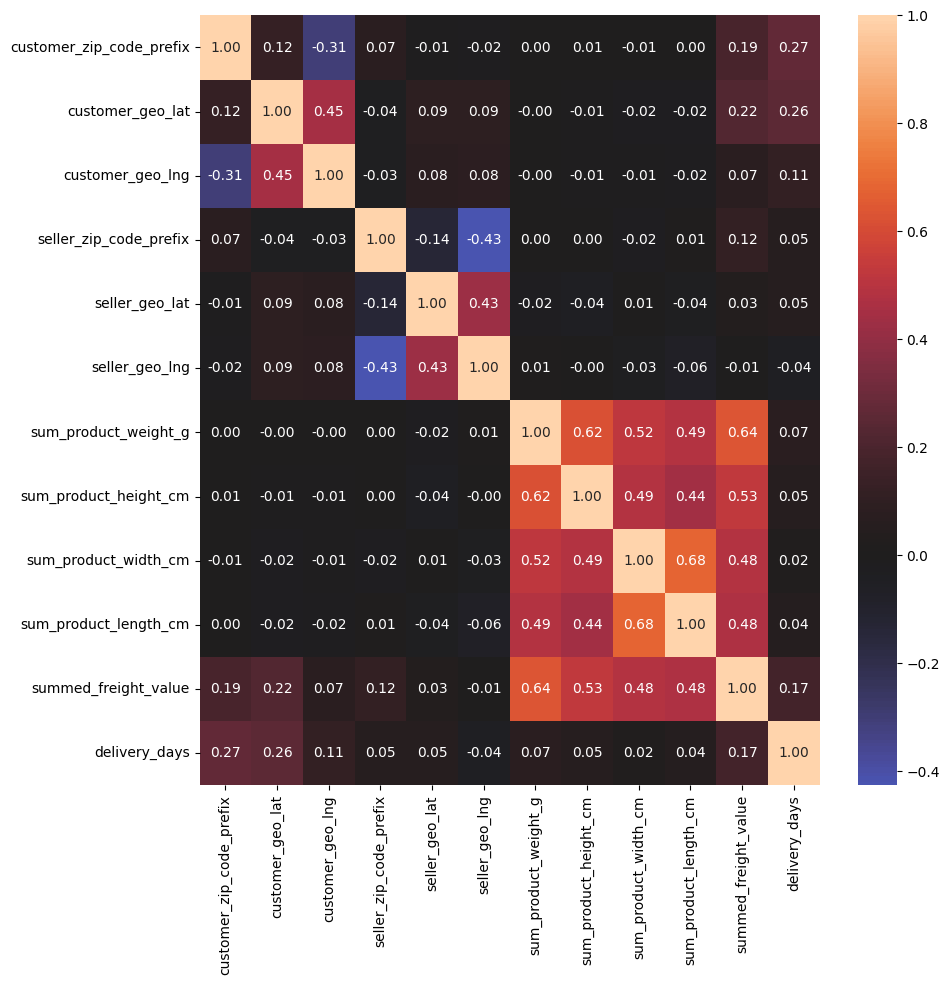

In [5]:
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

sns.heatmap(
    df.corr(method = "pearson"),
    annot = True,
    fmt = ".2f",
    center = 0
)

NOTE:
We can actually see that given our dataset, the correlation with our Y (delivery days) is pretty much non-existent, doesn't mean we can't work with this, in fact, there may be many explanations that can explain this heatmap, an example being that i didn't check for holidays in the dates, but this can work generally well anyway.

A second explanation may be on how i'm using lat-lng values, i **could** calculate the distance in km, but for now i'll keep it like this and see how a simple model works with this.


## Nan check

In [6]:
df.isnull().sum()
# Because in SQL i didn't check for all variables, but only for:
# order_delivered_carrier_date and order_delivered_customer_date

customer_zip_code_prefix      0
customer_geo_lat            270
customer_geo_lng            270
seller_zip_code_prefix        0
seller_geo_lat              217
seller_geo_lng              217
sum_product_weight_g         16
sum_product_height_cm        16
sum_product_width_cm         16
sum_product_length_cm        16
summed_freight_value          0
delivery_days                 0
dtype: int64

In [7]:
order_datetime = df_og["min_order_purchase_timestamp"]
order_datetime = pd.to_datetime(order_datetime)
order_datetime = order_datetime.dt.dayofweek
print(order_datetime.isna().sum().sum())
order_datetime.head(100)

0


0     2
1     2
2     6
3     2
4     5
     ..
95    5
96    4
97    6
98    5
99    2
Name: min_order_purchase_timestamp, Length: 100, dtype: int32

In [8]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean(), axis = 0)

print(df.isnull().sum().sum())
df.head(5)

0


,customer_zip_code_prefix,customer_geo_lat,customer_geo_lng,seller_zip_code_prefix,seller_geo_lat,seller_geo_lng,sum_product_weight_g,sum_product_height_cm,sum_product_width_cm,sum_product_length_cm,summed_freight_value,delivery_days
0,28013,-21.762775,-41.309633,27277,-22.496953,-44.127492,650.0,9.0,14.0,28.0,13.29,7.614421
1,15775,-20.220527,-50.903424,3471,-23.565096,-46.518565,30000.0,30.0,40.0,50.0,19.93,16.216181
2,35661,-19.870305,-44.593326,37564,-22.262584,-46.171124,3050.0,13.0,33.0,33.0,17.87,7.948437
3,12952,-23.089925,-46.611654,14403,-20.553624,-47.387359,200.0,10.0,15.0,16.0,12.79,6.147269
4,13226,-23.243402,-46.827614,87900,-22.929384,-53.135873,3750.0,40.0,30.0,35.0,18.14,25.114352


### Y Distribution plot

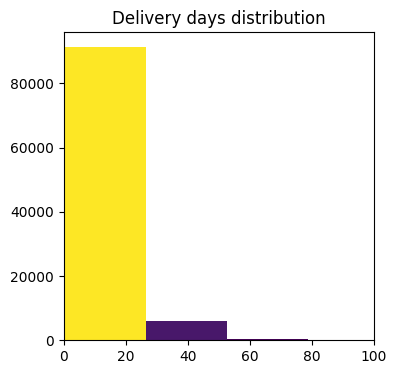

In [9]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(4)

cmap = plt.cm.viridis

counts, values, bars = ax.hist(
    df["delivery_days"],
    bins = 8
)
ax.set(
    xlim = (0, 100)
)
plt.title("Delivery days distribution")

for i, (cnt, value, bar) in enumerate(zip(counts, values, bars)):
    bar.set_facecolor(cmap(cnt/counts.max()))

plt.show()

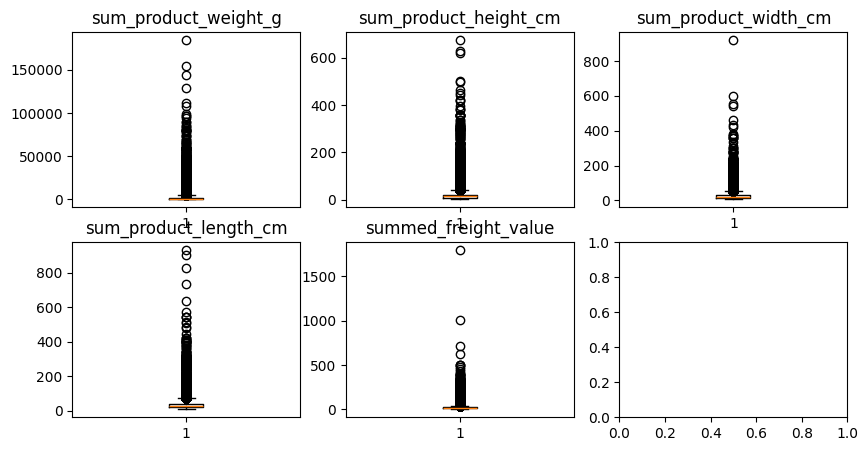

In [10]:
fig, ax = plt.subplots(2, 3)

fig.set_figheight(5)
fig.set_figwidth(10)

cols = ["sum_product_weight_g", "sum_product_height_cm", "sum_product_width_cm", "sum_product_length_cm", "summed_freight_value"]

for i, ax in enumerate(ax.flat):
    try:
        ax.boxplot(
            x = df[cols[i]]
        )
        ax.set_title(cols[i])
    except:
        continue

# XGBoost Model

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return mse, mae

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

x, y = df.drop(["customer_zip_code_prefix", "seller_zip_code_prefix", "delivery_days"], axis = 1), df["delivery_days"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

xg_reg = xgb.XGBRegressor(objective = "reg:squarederror", learning_rate = 0.05, max_depth = 7, n_estimators = 500)
xg_reg.fit(x_train, y_train)

y_test_pred = xg_reg.predict(x_test)

mse_xgb, mae_xgb = calculate_metrics(y_test_pred, y_test)
print(f"MSE XGB: {mse_xgb:.2f}")
print(f"Squared MSE XGB: {np.sqrt(mse_xgb):.2f}")
print(f"MAE XGB: {mae_xgb:.2f}")

MSE XGB: 68.23
Squared MSE XGB: 8.26
MAE XGB: 5.02


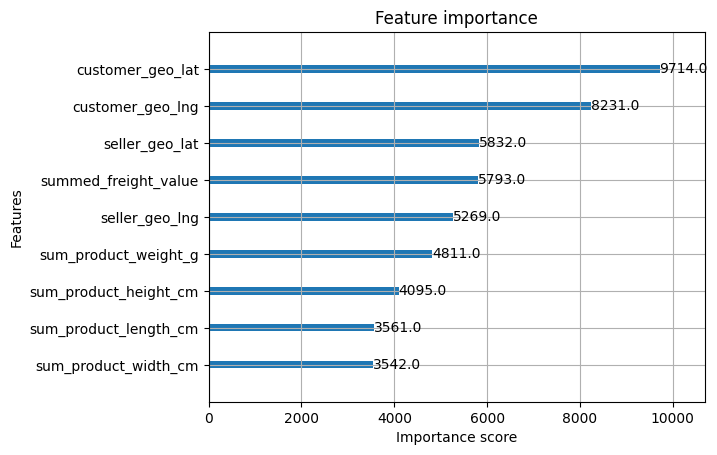

In [13]:
xg_reg.get_booster().feature_names = list(x_train.columns)
xgb.plot_importance(xg_reg)
plt.show()

We can see that our XGBoost considers really important the lat and lng of our customer, but not the ones for the seller, to make a quick test we can check if using the total distance in Km it changes

In [14]:
import math
def make_km(lat1, lng1, lat2, lng2):
    r = 6371 # Radius of earth in km
    dlat = (lat2 - lat1) * math.pi / 180
    dlng = (lng2 - lng1) * math.pi / 180

    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dlng / 2) * math.sin(dlng / 2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = r * c
    return d

x["km"] = x.apply(lambda x_: make_km(x_["customer_geo_lat"], x_["customer_geo_lng"], x_["seller_geo_lat"], x_["seller_geo_lng"]), axis = 1)

In [15]:
x["delivery_start_day_of_the_week"] = order_datetime

x = x.drop(["customer_geo_lat", "customer_geo_lng", "seller_geo_lat", "seller_geo_lng"], axis = 1)
print(x.columns)

Index(['sum_product_weight_g', 'sum_product_height_cm', 'sum_product_width_cm',
       'sum_product_length_cm', 'summed_freight_value', 'km',
       'delivery_start_day_of_the_week'],
      dtype='str')


In [16]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2)

xg_reg2 = xgb.XGBRegressor(objective = "reg:squarederror", learning_rate = 0.05, max_depth = 7, n_estimators = 500)
xg_reg2.fit(x_train2, y_train2)

y_test_pred_2 = xg_reg2.predict(x_test2)

mse_xgb2, mae_xgb2 = calculate_metrics(y_test_pred_2, y_test2)
print(f"MSE XGB2: {mse_xgb2:.2f}")
print(f"Squared MSE XGB2: {np.sqrt(mse_xgb2):.2f}")
print(f"MAE XGB2: {mae_xgb2:.2f}")

MSE XGB2: 73.27
Squared MSE XGB2: 8.56
MAE XGB2: 5.26


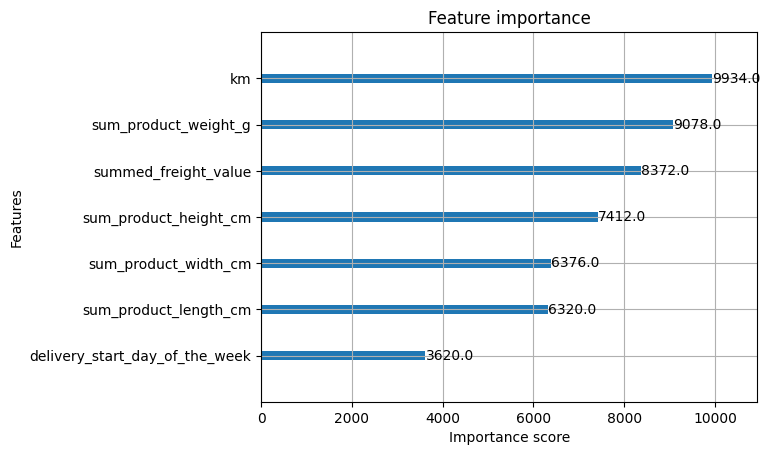

In [17]:
xg_reg2.get_booster().feature_names = list(x_train2.columns)
xgb.plot_importance(xg_reg2)
plt.show()

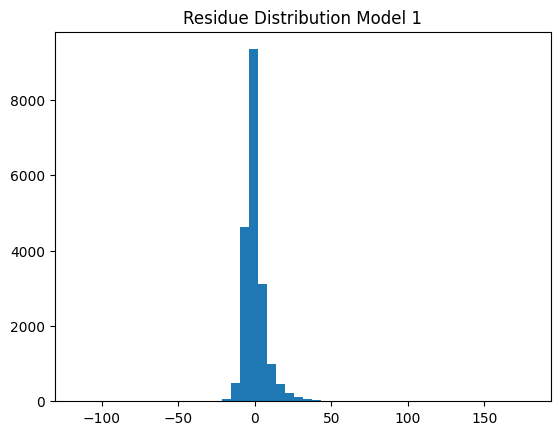

In [18]:
residuals = y_test - y_test_pred
plt.hist(residuals, bins = 50)
plt.title("Residue Distribution Model 1")
plt.show()

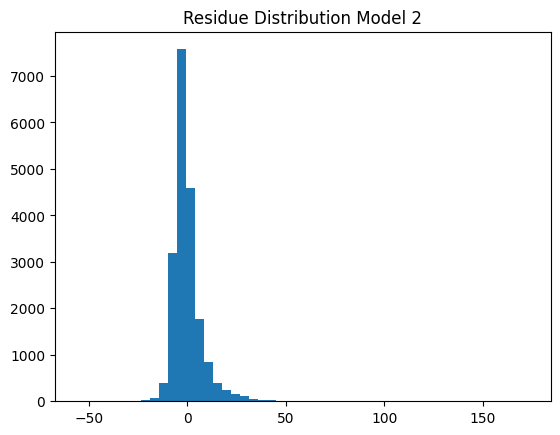

In [19]:
residuals = y_test2 - y_test_pred_2
plt.hist(residuals, bins = 50)
plt.title("Residue Distribution Model 2")
plt.show()

# End thoughts

We can see that even with some "upgrades" to the overall km, there are a few differences between the two models, even if the results seems practically the same.
- The first model has less MAE, meaning that the lat and lng values seem to be helping the model to "map the road" between the places.
- The second model has less MSE, meaning that we got less outliers in the data, probably because we removed the raw lat/lng, but added the overall km (air-distance, not considering: traffic, weather conditions, ecc...), the model seems to be more precise towards the delivery date.

In the end, both of our models seems to be around 8ish days less accurate than the true data, considering that our data may be lacking a few special conditions that can change the delivery time, as in, traffic, how many warehouses the package(s) stopped befoer resuming their delivery, weather conditions and even proper documentation of day of the week.